## Classifying News into Fake News or Real News

### Approach
    Convertion of the flag column to binary (0,1)
    Vectorization of features
    Using a Passive Aggressive Classifier Model to train the data
    Testing the data using the sklearn library
    
### Metrics Achieved
    Accuracy: 97.56%
    Precision: 97.63%
    Recall: 97.27%
    F1-score: 97.45%

In [ ]:
#Reading csv of preprocessed data that was obtained from data_preprocessing.ipynb
import pandas as pd
df = pd.read_csv("preprocessed_data.csv")

df.head()

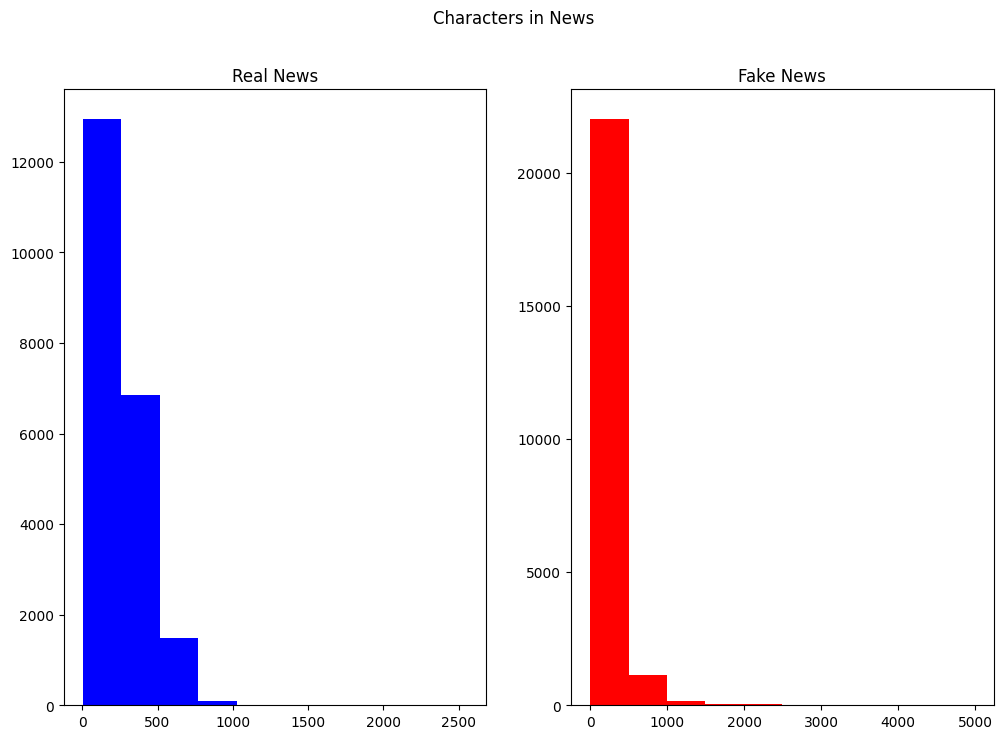

In [10]:
#Analysing similarities in Characters in fake and real news

import matplotlib.pyplot as plt
# Removing NULL values in text and flag column
filtered_df = df.dropna(subset=['text', 'flag'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

text_len = filtered_df[filtered_df['flag'] == 1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len, color='blue')
ax1.set_title('Real News')

text_len = filtered_df[filtered_df['flag'] == 0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len, color='red')
ax2.set_title('Fake News')

fig.suptitle('Characters in News')
plt.show()

In [12]:
#Splitting our dataset for training and testsing purposes
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(filtered_df['text'],filtered_df['flag'],random_state = 0)

In [51]:
# Conversion of features to vectors
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.05)

tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [56]:
# Usage of linear classification algorithm Passive Aggressive Classifier with sklearn
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score

pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

# Checking accuracy with the testing dataset
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 97.56%


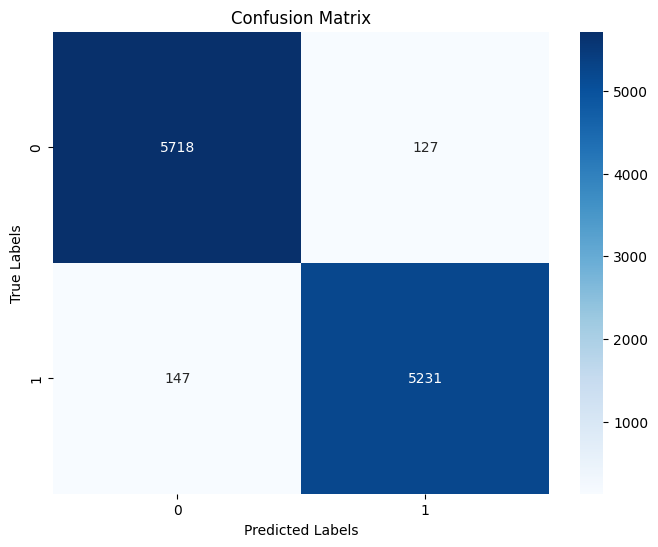

In [59]:
'''Confusion Matrix
[[TN FP]
 [FN TP]]
 true negatives (TN), false positives (FP), false negatives (FN), and true positives (TP)'''

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [57]:
# Analysing other metrics with sklearn

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print(f'Accuracy: {round(score*100, 2)}%')
print(f'Precision: {round(precision*100, 2)}%')
print(f'Recall: {round(recall*100, 2)}%')
print(f'F1-score: {round(f1*100, 2)}%')

Accuracy: 97.56%
Precision: 97.63%
Recall: 97.27%
F1-score: 97.45%
